#### Prepare

In [ ]:
# Import packages
library("microbiome")
library("ggplot2")
library("dplyr")
library("limma")
library("knitr")
library("knitr")

In [2]:
# Import data
data(peerj32) 
pseq <- peerj32$phyloseq 

# Get OTU abundances and sample metadata
otu <- abundances(microbiome::transform(pseq, "log10"))
meta <- meta(pseq)

head(otu)
head(meta)

Warning message in microbiome::transform(pseq, "log10"):
“OTU table contains zeroes. Using log10(1 + x) transform.”


,sample-1,sample-2,sample-3,sample-4,sample-5,sample-6,sample-7,sample-8,sample-9,sample-10,⋯,sample-35,sample-36,sample-37,sample-38,sample-39,sample-40,sample-41,sample-42,sample-43,sample-44
Actinomycetaceae,0.000000,0.4771213,1.0000000,0.698970,0.000000,0.602060,1.041393,1.397940,1.000000,1.301030,⋯,0.0000000,0.000000,0.301030,0.000000,1.113943,1.041393,0.000000,0.7781513,0.0000000,0.7781513
Aerococcus,0.845098,0.8450980,0.4771213,0.000000,1.146128,0.000000,1.146128,1.342423,1.000000,0.000000,⋯,0.7781513,1.431364,1.041393,1.397940,0.000000,0.000000,0.602060,0.6020600,0.6989700,0.4771213
Aeromonas,0.000000,1.2304489,1.0791812,1.278754,0.000000,0.000000,0.903090,0.000000,1.041393,1.079181,⋯,1.1461280,1.414973,0.000000,0.301030,0.000000,0.000000,1.255273,1.1461280,0.7781513,1.0413927
Akkermansia,2.352183,2.2718416,2.3521825,2.255273,2.383815,2.620136,2.553883,2.442480,2.905796,2.525045,⋯,2.1553360,2.361728,2.354108,2.399674,3.168792,3.382917,2.390935,2.5340261,2.8506462,2.5365584
Alcaligenes faecalis et rel.,0.000000,0.0000000,1.1139434,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.0000000,0.0000000
Allistipes et rel.,2.230449,2.0334238,2.2900346,2.336460,2.444045,2.495544,2.000000,2.093422,1.653213,1.939519,⋯,2.2624511,1.681241,2.491362,1.991226,2.480007,2.413300,1.826075,1.8450980,2.2600714,2.2624511


,time,sex,subject,sample,group
,<int>,<fct>,<fct>,<chr>,<fct>
sample-1,1,female,S1,sample-1,Placebo
sample-2,2,female,S1,sample-2,Placebo
sample-3,1,female,S2,sample-3,Placebo
sample-4,2,female,S2,sample-4,Placebo
sample-5,1,female,S3,sample-5,LGG
sample-6,2,female,S3,sample-6,LGG


#### Limma analysis

In [6]:
# Limma analysis
# Prepare the design matrix which states the groups for each sample in the otu
design <- cbind(intercept = 1, Grp2vs1 = meta[["sex"]])
rownames(design) <- rownames(meta)
design <- design[colnames(otu), ]

# NOTE: results and p-values are given for all groupings in the design matrix
# Now focus on the second grouping ie. pairwise comparison
coef.index <- 2
     
# Fit the limma model
fit <- lmFit(otu, design)
fit <- eBayes(fit)

# Limma P-values
pvalues.limma = fit$p.value[, 2]

# Limma effect sizes
efs.limma <-  fit$coefficients[, "Grp2vs1"]

# Summarise
kable(topTable(fit, coef = coef.index, p.value=0.1), digits = 2)



|                               | logFC| AveExpr|     t| P.Value| adj.P.Val|     B|
|:------------------------------|-----:|-------:|-----:|-------:|---------:|-----:|
|Uncultured Clostridiales II    | -0.41|    1.37| -3.72|       0|      0.06| -0.24|
|Eubacterium siraeum et rel.    | -0.34|    1.67| -3.52|       0|      0.06| -0.77|
|Clostridium nexile et rel.     |  0.18|    2.84|  3.41|       0|      0.06| -1.04|
|Sutterella wadsworthia et rel. | -0.33|    1.50| -3.13|       0|      0.10| -1.74|

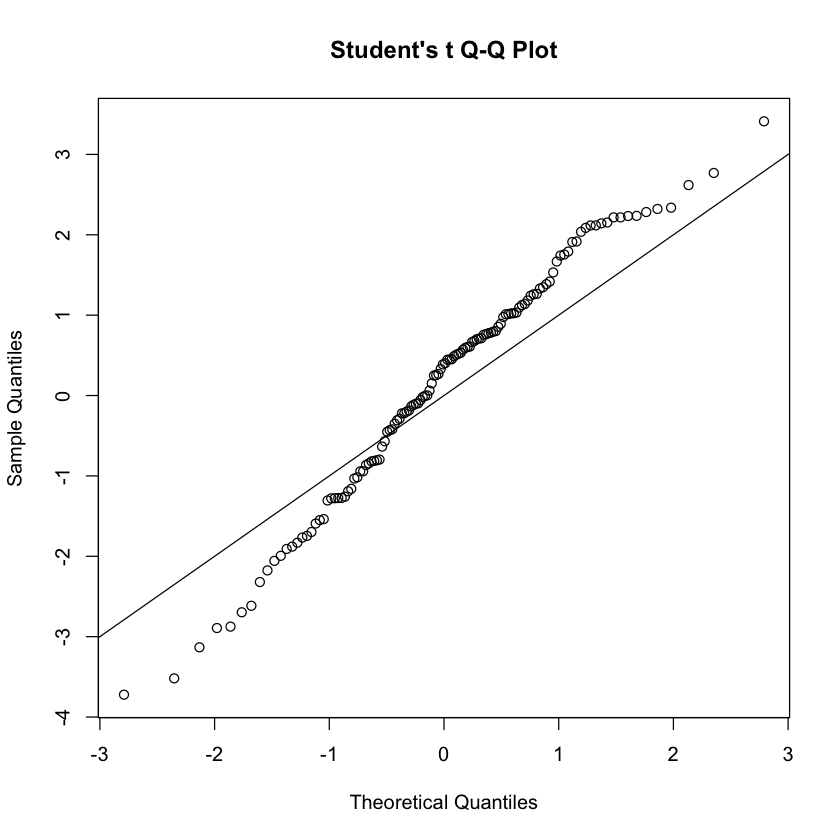

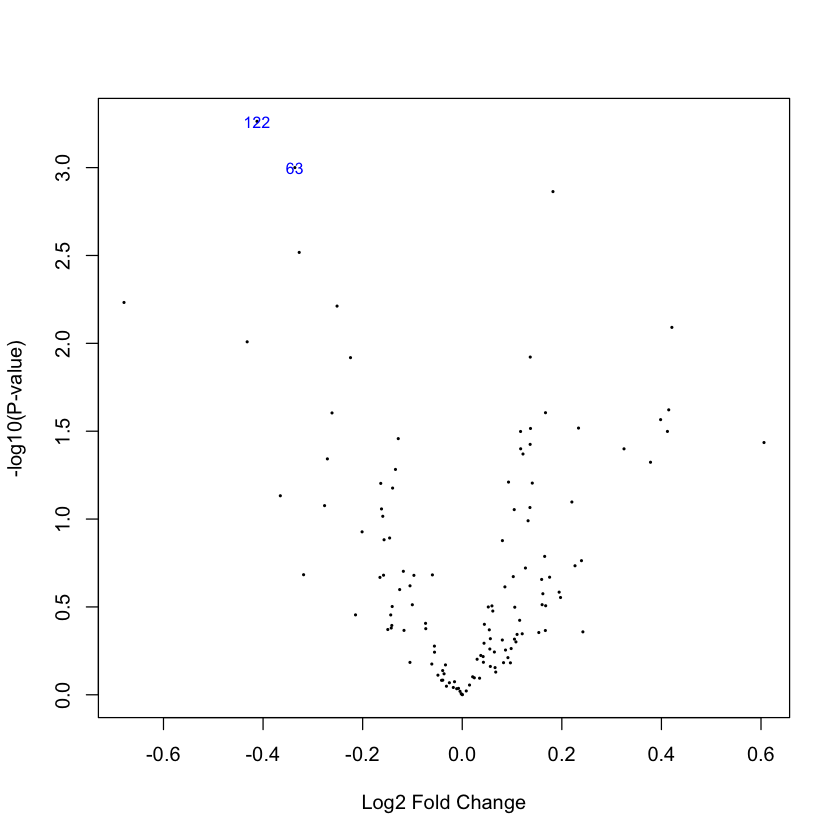

In [7]:
# Plot 
# QQ
qqt(fit$t[, coef.index], df = fit$df.residual + fit$df.prior); abline(0,1)

# Volcano
volcanoplot(fit, coef = coef.index, highlight = coef.index)